In [546]:
#Bazi Mathangeni
#22/09/2024

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

myRawData = pd.read_csv("../input_data/Almond.csv")

myRawData.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [547]:
myCleanData = myRawData.dropna(subset = ["Area", "Perimeter", "Roundness", "Solidity", "Compactness", "Aspect Ratio", "Eccentricity", "Extent", "Convex hull(convex area)", "Type"])

myCleanData.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
16,16,315.512085,169.067093,NaN,38551.5,831.085347,0.493082,0.983494,1.425739,1.866195,0.844313,0.777060,39198.5,MAMRA
17,17,318.522736,168.491837,NaN,38867.5,829.712764,0.487771,0.980549,1.409480,1.890434,0.848635,0.773575,39638.5,MAMRA
18,18,320.810455,168.278076,NaN,39255.5,834.884337,0.485639,0.982653,1.413000,1.906430,0.851385,0.783778,39948.5,MAMRA
19,19,317.151794,167.854141,NaN,39163.0,838.641696,0.495737,0.982255,1.429115,1.889449,0.848463,0.772141,39870.5,MAMRA
20,20,397.007843,188.688644,NaN,55550.0,1025.837653,0.448741,0.974989,1.507521,2.104037,0.879836,0.710458,56975.0,MAMRA


In [548]:
np.random.seed(12)

MAMRA = myCleanData[myCleanData["Type"] == "MAMRA"]
MAMRA = MAMRA.to_numpy()

np.random.shuffle(MAMRA)

MAMRA_TRAINING = MAMRA[ : math.floor(0.8*len(MAMRA))]
MAMRA_TEST = MAMRA[ math.floor(0.8*len(MAMRA)) : ]

In [549]:
SANORA = myCleanData[myCleanData["Type"] == "SANORA"]
SANORA = SANORA.to_numpy()

np.random.shuffle(SANORA)

SANORA_TRAINING = SANORA[ : math.floor(0.8*len(SANORA))]
SANORA_TEST = SANORA[ math.floor(0.8*len(MAMRA)) : ]

In [550]:
REGULAR = myCleanData[myCleanData["Type"] == "REGULAR"]

REGULAR = REGULAR.to_numpy()

np.random.shuffle(REGULAR)

REGULAR_TRAINING = REGULAR[ : math.floor(0.8*len(REGULAR))]
REGULAR_TEST = REGULAR[ math.floor(0.8*len(MAMRA)) : ]

In [551]:
MAMRA_SANORA_TRAINING = np.vstack((MAMRA_TRAINING, SANORA_TRAINING))
FINAL_TRAINING_DATA = np.vstack((MAMRA_SANORA_TRAINING, REGULAR_TRAINING))

np.random.shuffle(FINAL_TRAINING_DATA)

MAMRA_SANORA_TEST = np.vstack((MAMRA_TEST, SANORA_TEST))
FINAL_TEST_DATA = np.vstack((MAMRA_SANORA_TEST, REGULAR_TEST))

np.random.shuffle(FINAL_TEST_DATA)

In [552]:
predictorVariables = FINAL_TRAINING_DATA[ : , :13]
predictorVariables = np.float64(predictorVariables)

dependentVariable = FINAL_TRAINING_DATA[ : ,13: ]

dependentVariable[dependentVariable == "MAMRA"] = np.float64(0)
dependentVariable[dependentVariable == "SANORA"] = np.float64(1)
dependentVariable[dependentVariable == "REGULAR"] = np.float64(2)

In [553]:
testPredictorVariables= FINAL_TEST_DATA[ : , :13]
testPredictorVariables = np.float64(testPredictorVariables)

testDependentVariable = FINAL_TEST_DATA[ : ,13: ]

testDependentVariable[testDependentVariable == "MAMRA"] = np.float64(0)
testDependentVariable[testDependentVariable == "SANORA"] = np.float64(1)
testDependentVariable[testDependentVariable == "REGULAR"] = np.float64(2)

Here I standard my data to have a mean of 0 and variance of 1.

In [554]:
def normalizeAndCleanData(predictorVariables):

    pV_normalized = (predictorVariables - predictorVariables.mean(axis = 0))/(predictorVariables.std(axis = 0))
    pV_normalized[np.isnan(pV_normalized)] = np.float64(0)

    return pV_normalized

pV_normalized = normalizeAndCleanData(predictorVariables)
testPV_normalized = normalizeAndCleanData(testPredictorVariables)

Sigmoid function to compute the sigmoid activation value of inputs incoming into a layer.

In [555]:
def sigmoid(x):
    
    return (1/(1 + np.exp(-x)))

Sigmoid derivative function to compute gradient values during backpropation.

In [556]:
def sigmoidDerivative(x):
    
    return (x*(1-x))

Used (Error Sum Of Squares)/2 as my Error/Loss function, hence the function below compute the derivative of the outermost term of my error function. The product of this function, the above mentioned sigmoid function derivative and the values at the neurons of the layer preceding the output layer forms the overall derivative of the Loss Function with respect to Weights.

In [557]:
def outerTermDerivative(targetVal, estimatedVal):
    
    return (targetVal - estimatedVal)

Used to tranform the values of the models dependent variables from an array of values (1 by n) values of (0 = MAMRA, 1 = SANORA, 2 = REGULAR) to an array (3 by n) values with ([1, 0, 0] = MAMRA, [0, 1, 0] = SANORA and [0, 0, 1] = REGULAR).  

In [558]:
def transform(yVals):

    newArr = np.zeros((yVals.shape[0], 3))

    for i in range(len(yVals)):
        
        if yVals[i] == 0:
            newArr[i][0] += 1
        elif yVals[i] == 1:
            newArr[i][1] += 1
        else:
            newArr[i,2] += 1

    return newArr

My model is designed such that the brightness of the output neurons with respect to an input in predicting the out is expressed as a floating point values, with the most likely correct output yielding the highest values. This function supresses the 2 non maximum values to 0 and increases the maximum value to 1.

In [559]:
def classify(yVals):
    
    for i in range(len(yVals)):
        
        if (np.max(yVals[i]) == yVals[i][0]):
            yVals[i][0] = 1
            yVals[i][1] = 0
            yVals[i][2] = 0
        elif (np.max(yVals[i]) == yVals[i][1]):
            yVals[i][0] = 0
            yVals[i][1] = 1
            yVals[i][2] = 0
        elif (np.max(yVals[i]) == yVals[i][2]):
            yVals[i][0] = 0
            yVals[i][1] = 0
            yVals[i][2] = 1

    return yVals

This is my actual Forward Feed and Backpropagation model. It takes in the input values (xVals), target values as (yVals), input layer and hidden layer weights (w1), hidden layer and output layer weights (w2), learning rate value (learningRate) and number of epochs (numEs).

I have commented what each of lines of code does.

In [560]:
def ModelNetwork1(xVals, yVals, w1, w2, learningRate, numEs):

    for i in range(numEs):

        hiddenLayerParemeters = xVals.dot(w1) #multiplies and sums input layer values with their respective weights in preparation to feed the hidden layer as inputs
        hiddenLayerVals = sigmoid(hiddenLayerParemeters) #applies the sigmoid activation function on the incoming paremeters

        outputLayerParameter = hiddenLayerVals.dot(w2) #multiplies the hidden layer values their respective weights in preparation to feed the output layer as inputs
        outputVal = sigmoid(outputLayerParameter) #applied the sigmoid activation function on the incoming parameters to yield final output layer values

        derivativeOfOuterTerm = outerTermDerivative(yVals, outputVal) #computes the first term of the loss function value
        derivativeOfInnerTerm = sigmoidDerivative(outputVal) #computes the second term of the loss function value

        hidden_OutputLayerErrorTerm = derivativeOfOuterTerm * derivativeOfInnerTerm #this is the product of the 2 terms

        lossFunctionDerivative = hiddenLayerVals.T.dot(hidden_OutputLayerErrorTerm.astype(np.float64)) #this is the product of all 3 terms, yielding the actual loss function derivative value with respect to hidden layer and output layer weights
        w2 += lossFunctionDerivative*learningRate #multiplies the learning rate against the loss function derivative then updates the hidden layer - output layer weights
        
        input_HiddenLayerErrorTerm = hidden_OutputLayerErrorTerm.dot(w2.T) * sigmoidDerivative(hiddenLayerVals) #computes the loss function derivative with respect to input layer - hidden layer weights

        w1 += xVals.T.dot(input_HiddenLayerErrorTerm.astype(np.float64)) * learningRate #multiples the learning rate against the loss function derivative then updates the input layer - hidden layer weights

    return (w1, w2)

In [561]:
def Model1(xVals, yVals, w1, w2, learningRate):

    hiddenLayerParemeters = xVals.dot(w1) #multiplies and sums input layer values with their respective weights in preparation to feed the hidden layer as inputs
    hiddenLayerVals = sigmoid(hiddenLayerParemeters) #applies the sigmoid activation function on the incoming paremeters

    outputLayerParameter = hiddenLayerVals.dot(w2) #multiplies the hidden layer values their respective weights in preparation to feed the output layer as inputs
    outputVal = sigmoid(outputLayerParameter) #applied the sigmoid activation function on the incoming parameters to yield final output layer values

    derivativeOfOuterTerm = outerTermDerivative(yVals, outputVal) #computes the first term of the loss function value
    derivativeOfInnerTerm = sigmoidDerivative(outputVal) #computes the second term of the loss function value

    hidden_OutputLayerErrorTerm = derivativeOfOuterTerm * derivativeOfInnerTerm #this is the product of the 2 terms

    lossFunctionDerivative = hiddenLayerVals.T.dot(hidden_OutputLayerErrorTerm.astype(np.float64)) #this is the product of all 3 terms, yielding the actual loss function derivative value with respect to hidden layer and output layer weights
    w2 += lossFunctionDerivative*learningRate #multiplies the learning rate against the loss function derivative then updates the hidden layer - output layer weights
    
    input_HiddenLayerErrorTerm = hidden_OutputLayerErrorTerm.dot(w2.T) * sigmoidDerivative(hiddenLayerVals) #computes the loss function derivative with respect to input layer - hidden layer weights

    w1 += xVals.T.dot(input_HiddenLayerErrorTerm.astype(np.float64)) * learningRate #multiples the learning rate against the loss function derivative then updates the input layer - hidden layer weights

    return xVals.T.dot(input_HiddenLayerErrorTerm.astype(np.float64)), lossFunctionDerivative

In [562]:
def Model2(xVals, yVals, w1, w2, learningRate1, learningRate2):

    hiddenLayerParemeters = xVals.dot(w1) #multiplies and sums input layer values with their respective weights in preparation to feed the hidden layer as inputs
    hiddenLayerVals = sigmoid(hiddenLayerParemeters) #applies the sigmoid activation function on the incoming paremeters

    outputLayerParameter = hiddenLayerVals.dot(w2) #multiplies the hidden layer values their respective weights in preparation to feed the output layer as inputs
    outputVal = sigmoid(outputLayerParameter) #applied the sigmoid activation function on the incoming parameters to yield final output layer values

    derivativeOfOuterTerm = outerTermDerivative(yVals, outputVal) #computes the first term of the loss function value
    derivativeOfInnerTerm = sigmoidDerivative(outputVal) #computes the second term of the loss function value

    hidden_OutputLayerErrorTerm = derivativeOfOuterTerm * derivativeOfInnerTerm #this is the product of the 2 terms

    lossFunctionDerivative = hiddenLayerVals.T.dot(hidden_OutputLayerErrorTerm.astype(np.float64)) #this is the product of all 3 terms, yielding the actual loss function derivative value with respect to hidden layer and output layer weights
    w2 += lossFunctionDerivative*learningRate2 #multiplies the learning rate against the loss function derivative then updates the hidden layer - output layer weights
    
    input_HiddenLayerErrorTerm = hidden_OutputLayerErrorTerm.dot(w2.T) * sigmoidDerivative(hiddenLayerVals) #computes the loss function derivative with respect to input layer - hidden layer weights

    w1 += xVals.T.dot(input_HiddenLayerErrorTerm.astype(np.float64)) * learningRate1 #multiples the learning rate against the loss function derivative then updates the input layer - hidden layer weights

    return xVals.T.dot(input_HiddenLayerErrorTerm.astype(np.float64)), lossFunctionDerivative

In [563]:
def getLearningRateIndex(prev_m1, prev_m2, m1, m2, i1, i2):

    commonDir1 = 0
    total1 = 0

    for i in range(prev_m1.shape[0]):
        for j in range(prev_m1.shape[1]):
            total1 += 1
            if (prev_m1[i, j]*m1[i, j] > 0):
                commonDir1 += 1

    commonDir2 = 0
    total2 = 0
    
    for i in range(prev_m2.shape[0]):
        for j in range(prev_m2.shape[1]):
            total2 += 1
            if (prev_m2[i, j]*m2[i, j]  > 0):
                commonDir2 += 1

    if ((commonDir1/total1) > 0.5):
        if i1 < 4:
            i1 += 1
    
    elif ((commonDir1/total1) <= 0.5):
        i1 = 0

    if ((commonDir2/total2) > 0.5):
        if i2 < 4:
            i2 += 1
    
    elif ((commonDir2/total2) <= 0.5):
        i2 = 0

    return i1, i2

In [564]:
def evaluate(xVals, yVals, weightsInput_Hidden, weightsHidden_Output):

    transformedDV = transform(yVals)

    matches = sigmoid(sigmoid(xVals.dot(weightsInput_Hidden)).dot(weightsHidden_Output))

    a = 0
    hits = 0
    classifyVals = classify(matches)

    for val in classifyVals:
        if ((val[0] == transformedDV[a][0]) & (val[1] == transformedDV[a][1]) & (val[2] == transformedDV[a][2])):
            hits += 1
        a += 1

    return ((hits/a)*100)

In [565]:
def HybridNetworkPerformance(xVals, yVals):   

    OneEpochIntervals = []
    FiveEpochsIntervals = []
    
    for j in range(0, 120, 20):

        inputLayerSize = xVals.shape[1]
        hiddenLayerSize = 20
        outputLayerSize = 3

        learningRates = [0.01, 0.05, 0.1, 0.25, 0.5]
        numEs = 1000

        np.random.seed(20)

        w1m1 = np.random.rand(inputLayerSize, hiddenLayerSize)
        w2m1 = np.random.rand(hiddenLayerSize, outputLayerSize)

        np.random.seed(20)

        w1m2 = np.random.rand(inputLayerSize, hiddenLayerSize)
        w2m2 = np.random.rand(hiddenLayerSize, outputLayerSize)

        np.random.seed(20)

        hybridW1 = np.random.rand(inputLayerSize, hiddenLayerSize)
        hybridW2 = np.random.rand(hiddenLayerSize, outputLayerSize)

        model3HitRates = []
        model3HitRates1 = []

        model3HitRates.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))
        model3HitRates1.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

        rateIndex1 = 0
        rateIndex2 = 0

        m1m1, m2m1 = Model1(xVals, yVals, w1m1, w2m1, learningRates[0])
        prev_m1m2, prev_m2m2 = Model2(xVals, yVals, w1m2, w2m2, learningRates[rateIndex1], learningRates[rateIndex2])

        hybridW1 += ((j/100)*m1m1 + ((100-j)/100)*prev_m1m2)
        hybridW2 += ((j/100)*m2m1 + ((100-j)/100)*prev_m2m2)

        model3HitRates.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2)) 

        for i in range(2, 100):

            m1m1, m2m1 = Model1(xVals, yVals, w1m1, w2m1, learningRates[0])
            m1m2, m2m2 = Model2(xVals, yVals, w1m2, w2m2, learningRates[rateIndex1], learningRates[rateIndex2])

            hybridW1 += ((j/100)*m1m1 + ((100-j)/100)*m1m2)
            hybridW2 += ((j/100)*m2m1 + ((100-j/100))*m2m2)

            rateIndex1, rateIndex2 = getLearningRateIndex(prev_m1m2, prev_m2m2, m1m2, m2m2, rateIndex1, rateIndex2)

            if (i < 21):
                
                model3HitRates.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

            if (i%5 == 0):
                
                model3HitRates1.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

            prev_m1m2 = m1m2
            prev_m2m2 = m2m2
        OneEpochIntervals.append(model3HitRates)
        FiveEpochsIntervals.append(model3HitRates1)

    plt.plot(OneEpochIntervals[0], label = "Average", marker = "^")
    
    plt.title("Models Comparisons")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")

    plt.xticks(ticks = range(0, 21))

    plt.legend()

    plt.show()

    
    plt.plot(FiveEpochsIntervals[0], label = "Average", marker = "^")
    #plt.xticks(ticks = range(0, 10), labels = ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"])

    plt.legend()

    plt.show()

#HybridNetworkPerformance(pV_normalized, transform(dependentVariable))

In [566]:
def trainAndEvaluate(hiddenLayerSize, learningRate, numEpochs):
    
    inputSize = pV_normalized.shape[1]

    outputLayerSize = 3

    np.random.seed(12)

    weightsInput_Hidden = np.random.rand(inputSize, hiddenLayerSize)
    weightsHidden_Output = np.random.rand(hiddenLayerSize, outputLayerSize)

    transformedDV = transform(dependentVariable)

    weightsInput_Hidden, weightsHidden_Output = ModelNetwork1(pV_normalized, transformedDV, weightsInput_Hidden, weightsHidden_Output, learningRate, numEpochs)
    
    return evaluate(testPV_normalized, testDependentVariable, weightsInput_Hidden, weightsHidden_Output)
    

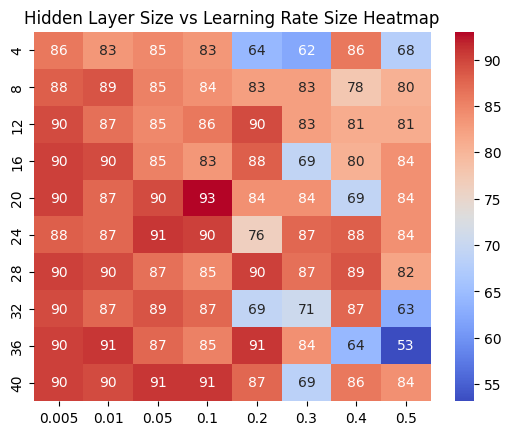

In [567]:
def runGridSearch1():

    hiddenLayerSizes = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    learningRateSizes = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

    results = []

    maxV = 0
    maxHLayer = 0
    maxLRSize = 0

    for hiddenLayerSize in hiddenLayerSizes:
        tempResults = []
        for learningRateSize in learningRateSizes:
            val = trainAndEvaluate(hiddenLayerSize, learningRateSize, 10000)
            maxV = max(maxV, val)

            if (maxV == val):
                maxHLayer = hiddenLayerSize
                maxLRSize = learningRateSize

            tempResults.append(val)
        results.append(tempResults)
    
    return (np.array(results), maxHLayer, maxLRSize, maxV)

hlSizeVSlrSizeData = runGridSearch1()[0]

xLabels = ["0.005", "0.01", "0.05", "0.1", "0.2", "0.3", "0.4", "0.5"]
yLabels = ["4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

sns.heatmap(hlSizeVSlrSizeData, annot = True, cmap = "coolwarm", xticklabels = xLabels, yticklabels = yLabels)
plt.title("Hidden Layer Size vs Learning Rate Size Heatmap")
plt.show()

In [568]:
print("Learning Rate, Number of Epochs fixed at 10000\n")
lrMeans = hlSizeVSlrSizeData.mean(axis = 0)
lrVariance = hlSizeVSlrSizeData.std(axis = 0)
i = 0

for x in xLabels:
    print("Learning rate", x, "has mean =", lrMeans[i], "variance", lrVariance[i]**2)
    i += 1

print("\nThe variance across the means of the Learning Rates is", (lrMeans.std())**2)

Learning Rate, Number of Epochs fixed at 10000

Learning rate 0.005 has mean = 89.23076923076921 variance 1.780038143674507
Learning rate 0.01 has mean = 88.04195804195804 variance 4.151792263680376
Learning rate 0.05 has mean = 87.4125874125874 variance 5.574844735683902
Learning rate 0.1 has mean = 86.78321678321679 variance 10.90028852266616
Learning rate 0.2 has mean = 82.23776223776224 variance 78.16519145190476
Learning rate 0.3 has mean = 77.76223776223776 variance 74.40950657733876
Learning rate 0.4 has mean = 80.9090909090909 variance 63.08865959215613
Learning rate 0.5 has mean = 76.29370629370631 variance 108.90019071837254

The variance across the means of the learning rates is 21.582656853635815


In [569]:
print("Hidden Layer Size, Number of Epcohs fixed at 10000\n")
hlMeans = hlSizeVSlrSizeData.mean(axis = 1)
hlVariance = hlSizeVSlrSizeData.std(axis = 1)
i = 0

for y in yLabels:
    print("Hidden Layer Size", y, "has mean =", hlMeans[i], "variance", hlVariance[i]**2)
    i += 1

print("\nThe variance across the means of the Hidden Layer Sizes is", (hlMeans.std())**2)

Hidden Layer Size, Number of Epcohs fixed at 10000

Hidden Layer Size 4 has mean = 77.1853146853147 variance 94.98477920680715
Hidden Layer Size 8 has mean = 83.65384615384616 variance 12.34015110763363
Hidden Layer Size 12 has mean = 85.13986013986013 variance 10.116631620128107
Hidden Layer Size 16 has mean = 83.74125874125875 variance 39.824685803706814
Hidden Layer Size 20 has mean = 85.13986013986015 variance 46.18196488825862
Hidden Layer Size 24 has mean = 86.53846153846155 variance 19.04127341190281
Hidden Layer Size 28 has mean = 87.32517482517483 variance 7.755574844735678
Hidden Layer Size 32 has mean = 80.41958041958041 variance 103.30578512396693
Hidden Layer Size 36 has mean = 80.76923076923077 variance 175.31419629321726
Hidden Layer Size 40 has mean = 85.92657342657343 variance 48.711122793290606

The variance across the means of the Hidden Layer Sizes is 9.19635434495574


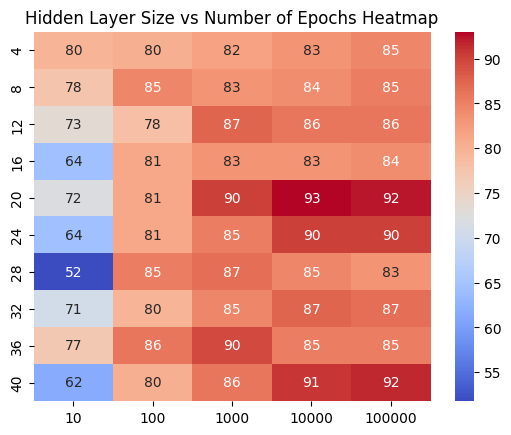

In [570]:
def runGridSearch2():
    
    hiddenLayerSizes = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    numEpochs = [10, 100, 1000, 10000, 100000]

    results = []

    maxV = 0
    maxHLayer = 0
    maxNumEs = 0


    for hiddenLayerSize in hiddenLayerSizes:
        tempResults = []
        for numEs in numEpochs:
            val = trainAndEvaluate(hiddenLayerSize, 0.1, numEs)
            maxV = max(maxV, val)

            if (maxV == val):
                maxHLayer = hiddenLayerSize
                maxNumEs = numEs
            
            tempResults.append(val)
        results.append(tempResults)

    return (np.array(results), maxHLayer, maxNumEs, maxV)

hlSizeVSnumEsData = runGridSearch2()[0]

xLabels = ["10", "100", "1000", "10000", "100000"]
yLabels = ["4", "8", "12", "16", "20", "24", "28", "32", "36", "40"]

sns.heatmap(hlSizeVSnumEsData, annot = True, cmap = "coolwarm", xticklabels = xLabels, yticklabels = yLabels)
plt.title("Hidden Layer Size vs Number of Epochs Heatmap")
plt.show()

In [576]:
print("Hidden Layer Size, Learning Rate fixed at 0.1\n")
hlMeans = hlSizeVSnumEsData.mean(axis = 1)
hlVariance = hlSizeVSnumEsData.std(axis = 1)
i = 0

for y in yLabels:
    print("Hidden Layer Size", y, "has mean =", hlMeans[i], "variance", hlVariance[i]**2)
    i += 1

print("\nThe variance across the means of the Hidden Layer Sizes is", (hlMeans.std())**2)

Hidden Layer Size, Learning Rate fixed at 0.1

Hidden Layer Size 0.005 has mean = 81.95804195804196 variance 3.207980830358452
Hidden Layer Size 0.01 has mean = 82.93706293706293 variance 7.550491466575365
Hidden Layer Size 0.05 has mean = 82.23776223776224 variance 29.65426182209399
Hidden Layer Size 0.1 has mean = 79.16083916083915 variance 55.826690791725774
Hidden Layer Size 0.2 has mean = 85.73426573426573 variance 65.05941610836716
Hidden Layer Size 0.3 has mean = 82.23776223776224 variance 91.6621839698763
Hidden Layer Size 0.4 has mean = 78.32167832167832 variance 177.80820578023372
Hidden Layer Size 0.5 has mean = 81.81818181818183 variance 38.534891681744824

The variance across the means of the Hidden Layer Sizes is 4.328622426524532


In [577]:
print("Number of Epochs, Learning Rate fixed at 0.1\n")
numEMeans = hlSizeVSnumEsData.mean(axis = 0)
numEVariance = hlSizeVSnumEsData.std(axis = 0)
i = 0

for x in xLabels:
    print("Number of Epochs", x, "has mean =", numEMeans[i], "variance", numEVariance[i]**2)
    i += 1

print("\nThe variance across the means of the Number of Epochs is", (numEMeans.std())**2)

Number of Epochs, Learning Rate fixed at 0.1

Number of Epochs 10 has mean = 69.23076923076923 variance 67.97398405790017
Number of Epochs 100 has mean = 81.81818181818181 variance 5.966061910117852
Number of Epochs 1000 has mean = 85.80419580419581 variance 6.7533864736661915
Number of Epochs 10000 has mean = 86.78321678321679 variance 10.90028852266616
Number of Epochs 100000 has mean = 86.92307692307693 variance 9.589710988312389

The variance across the means of the Number of Epochs is 44.92229448872811


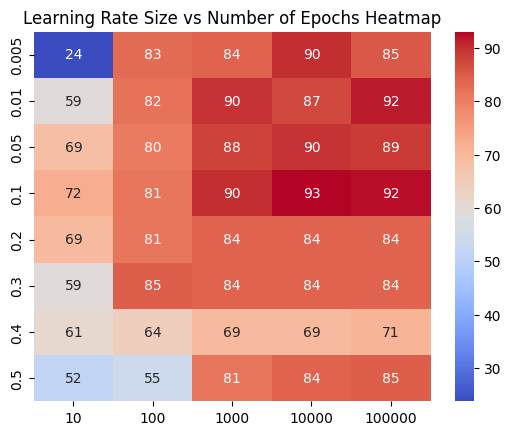

In [571]:
def runGridSearch3():
    
    learningRateSizes = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    numEpochs = [10, 100, 1000, 10000, 100000]

    results = []

    maxV = 0
    maxLRSize = 0
    maxNumEs = 0


    for learningRateSize in learningRateSizes:
        tempResults = []
        for numEs in numEpochs:
            val = trainAndEvaluate(20, learningRateSize, numEs)
            maxV = max(maxV, val)

            if (maxV == val):
                maxLRSize = learningRateSize
                maxNumEs = numEs
            
            tempResults.append(val)
        results.append(tempResults)

    return (np.array(results), maxLRSize, maxNumEs, maxV)

lrSizeVSnumEsData = runGridSearch3()[0]

xLabels = ["10", "100", "1000", "10000", "100000"]
yLabels = ["0.005", "0.01", "0.05", "0.1", "0.2", "0.3", "0.4", "0.5"]

sns.heatmap(lrSizeVSnumEsData, annot = True, cmap = "coolwarm", xticklabels = xLabels,yticklabels = yLabels)
plt.title("Learning Rate Size vs Number of Epochs Heatmap")
plt.show()

In [574]:
print("Learning Rate, Hidden Layer fixed at 20\n")
lrMeans = lrSizeVSnumEsData.mean(axis = 1)
lrVariance = lrSizeVSnumEsData.std(axis = 1)
i = 0

for y in yLabels:
    print("Learning rate", y, "has mean =", lrMeans[i], "variance", lrVariance[i]**2)
    i += 1

print("\nThe variance across the means of the Learning Rates is", (lrMeans.std())**2)

Learning Rate, Hidden Layer fixed at 20

Learning rate 0.005 has mean = 73.14685314685315 variance 616.0888062985965
Learning rate 0.01 has mean = 81.95804195804196 variance 137.3954716612059
Learning rate 0.05 has mean = 83.07692307692307 variance 63.65103428040491
Learning rate 0.1 has mean = 85.73426573426573 variance 65.05941610836716
Learning rate 0.2 has mean = 80.41958041958041 variance 32.47102547801852
Learning rate 0.3 has mean = 79.16083916083917 variance 97.2957112817253
Learning rate 0.4 has mean = 66.85314685314685 variance 13.6143576703017
Learning rate 0.5 has mean = 71.1888111888112 variance 219.15986111790312

The variance across the means of the Learning Rates is 37.737786688835605


In [575]:
print("Number of Epochs, Hidden Layer fixed at 20\n")
numEMeans = lrSizeVSnumEsData.mean(axis = 0)
numEVariance = lrSizeVSnumEsData.std(axis = 0)
i = 0

for x in xLabels:
    print("Number of Epochs", x, "has mean =", numEMeans[i], "variance", numEVariance[i]**2)
    i += 1

print("\nThe variance across the means of the Number of Epochs is", (numEMeans.std())**2)

Number of Epochs, Hidden Layer fixed at 20

Number of Epochs 10 has mean = 58.12937062937063 variance 207.0318230720329
Number of Epochs 100 has mean = 76.3111888111888 variance 102.25897354393864
Number of Epochs 1000 has mean = 83.74125874125875 variance 38.96889823463252
Number of Epochs 10000 has mean = 85.13986013986015 variance 46.18196488825862
Number of Epochs 100000 has mean = 85.13986013986015 variance 40.069196537728004

The variance across the means of the Number of Epochs is 106.427575920583


In [572]:
def runGridSearchAll():

    hiddenLayerSizes = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    learningRateSizes = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    numEpochs = [10, 100, 1000, 10000, 100000]

    maxV = 0
    maxHLSize = 0
    maxLRSize = 0
    maxNumEs = 0

    for hiddenLayerSize in hiddenLayerSizes[::-1]:
        for learningRateSize in learningRateSizes:
            for numEs in numEpochs[::-1]:
                val = trainAndEvaluate(hiddenLayerSize, learningRateSize, numEs)
                maxV = max(maxV, val)

                if (maxV == val):
                    maxHLSize = hiddenLayerSize
                    maxLRSize = learningRateSize
                    maxNumEs = numEs

    return (maxHLSize, maxLRSize, maxNumEs, maxV)

#hlSize, lrSize, numEs, maxV = runGridSearchAll()

#print("The best combination of hidden layer size, learning rate and number of epochs is", hlSize, lrSize, numEs, "yielding a hit rate of", maxV, end = ".")

C:\Users\shabier\AppData\Local\Temp\ipykernel_17672\1205806758.py:3: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-x)))


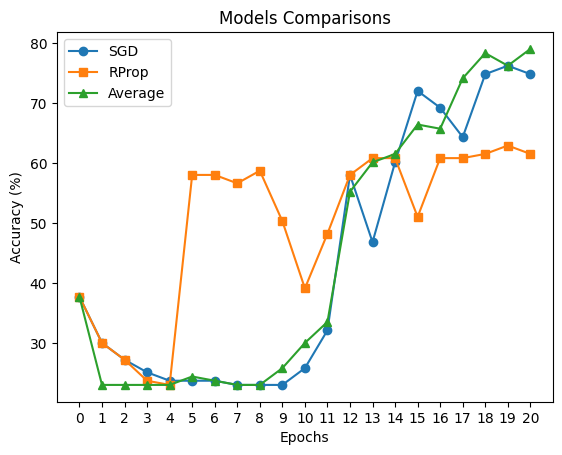

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (11).

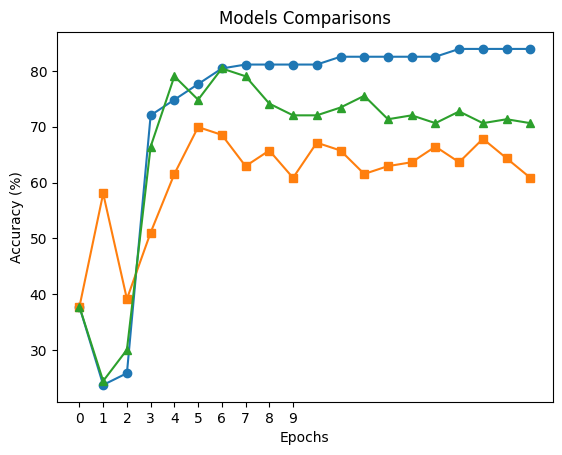

In [573]:
def ModelHybridNetwork(xVals, yVals):

    inputLayerSize = xVals.shape[1]
    hiddenLayerSize = 20
    outputLayerSize = 3

    learningRates = [0.01, 0.05, 0.1, 0.25, 0.5]
    numEs = 1000

    np.random.seed(20)

    w1m1 = np.random.rand(inputLayerSize, hiddenLayerSize)
    w2m1 = np.random.rand(hiddenLayerSize, outputLayerSize)

    np.random.seed(20)

    w1m2 = np.random.rand(inputLayerSize, hiddenLayerSize)
    w2m2 = np.random.rand(hiddenLayerSize, outputLayerSize)

    np.random.seed(20)

    hybridW1 = np.random.rand(inputLayerSize, hiddenLayerSize)
    hybridW2 = np.random.rand(hiddenLayerSize, outputLayerSize)

    rateIndex1 = 0
    rateIndex2 = 0
    
    model1HitRates = []
    model2HitRates = []
    model3HitRates = []

    model1HitRates1 = []
    model2HitRates1 = []
    model3HitRates1 = []

    model1HitRates.append(evaluate(testPV_normalized, testDependentVariable, w1m1, w2m1))
    model2HitRates.append(evaluate(testPV_normalized, testDependentVariable, w1m2, w2m2))
    model3HitRates.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

    model1HitRates1.append(evaluate(testPV_normalized, testDependentVariable, w1m1, w2m1))
    model2HitRates1.append(evaluate(testPV_normalized, testDependentVariable, w1m2, w2m2))
    model3HitRates1.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

    m1m1, m2m1 = Model1(xVals, yVals, w1m1, w2m1, learningRates[0])
    prev_m1m2, prev_m2m2 = Model2(xVals, yVals, w1m2, w2m2, learningRates[rateIndex1], learningRates[rateIndex2])

    hybridW1 += (m1m1+prev_m1m2)*0.5
    hybridW2 += (m2m1+prev_m2m2)*0.5
    
    model1HitRates.append(evaluate(testPV_normalized, testDependentVariable, w1m1, w2m1))
    model2HitRates.append(evaluate(testPV_normalized, testDependentVariable, w1m2, w2m2))
    model3HitRates.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

    for i in range(2, 100):

        m1m1, m2m1 = Model1(xVals, yVals, w1m1, w2m1, learningRates[0])
        m1m2, m2m2 = Model2(xVals, yVals, w1m2, w2m2, learningRates[rateIndex1], learningRates[rateIndex2])

        hybridW1 += (m1m1 + m1m2)*0.5
        hybridW2 += (m2m1 + m2m2)*0.5

        rateIndex1, rateIndex2 = getLearningRateIndex(prev_m1m2, prev_m2m2, m1m2, m2m2, rateIndex1, rateIndex2)

        if (i < 21):
            model1HitRates.append(evaluate(testPV_normalized, testDependentVariable, w1m1, w2m1))
            model2HitRates.append(evaluate(testPV_normalized, testDependentVariable, w1m2, w2m2))
            model3HitRates.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

        if (i%5 == 0):
            model1HitRates1.append(evaluate(testPV_normalized, testDependentVariable, w1m1, w2m1))
            model2HitRates1.append(evaluate(testPV_normalized, testDependentVariable, w1m2, w2m2))
            model3HitRates1.append(evaluate(testPV_normalized, testDependentVariable, hybridW1, hybridW2))

        prev_m1m2 = m1m2
        prev_m2m2 = m2m2

    plt.plot(model1HitRates, label = "SGD", marker = "o")
    plt.plot(model2HitRates, label = "RProp", marker = "s")
    plt.plot(model3HitRates, label = "Average", marker = "^")

    plt.title("Models Comparisons")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")

    plt.xticks(ticks = range(0, 21))

    plt.legend()

    plt.show()

    plt.title("Models Comparisons")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")

    plt.plot(model1HitRates1, label = "SGD", marker = "o")
    plt.plot(model2HitRates1, label = "RProp", marker = "s")
    plt.plot(model3HitRates1, label = "Average", marker = "^")

    #plt.xticks(ticks = range(0, 10), labels = ["0", " 10", " 20", " 30", " 40", " 50", " 60", " 70", " 80", " 90", " 100"])

    plt.legend()

    plt.show()

ModelHybridNetwork(pV_normalized, transform(dependentVariable))